This notebook allows to reproduce the paper synthetic results. First, we create a synthetic population with different disease expression. Then, we enforce missingness following three scenario of clinical presence, i.e. the interaction between patient and the healthcare system:
- (Mis)-informed collection
- Limited access to quality care
- Confirmation bias

In [1]:
from synthetic_utils import *
import numpy as np

In [2]:
# Number of random repetitions
k = 100

### Generate data

First, we create the data from three gaussian: one for positives and two for negatives (one for the minority and one for the majority). This same function is then called at each $k$ iteration.

C:\Users\steph\OneDrive\Documents\Georgia Tech\ISYE 8803 - High Dimensional Data Analytics\HW1\lib\site-packages\seaborn\distributions.py:1185: UserWarning: The following kwargs were not used by contour: 'linewidth'
  cset = contour_func(
C:\Users\steph\OneDrive\Documents\Georgia Tech\ISYE 8803 - High Dimensional Data Analytics\HW1\lib\site-packages\seaborn\distributions.py:1185: UserWarning: The following kwargs were not used by contour: 'linewidth'
  cset = contour_func(
C:\Users\steph\OneDrive\Documents\Georgia Tech\ISYE 8803 - High Dimensional Data Analytics\HW1\lib\site-packages\seaborn\distributions.py:1185: UserWarning: The following kwargs were not used by contour: 'linewidth'
  cset = contour_func(
C:\Users\steph\OneDrive\Documents\Georgia Tech\ISYE 8803 - High Dimensional Data Analytics\HW1\lib\site-packages\seaborn\distributions.py:1185: UserWarning: The following kwargs were not used by contour: 'linewidth'
  cset = contour_func(


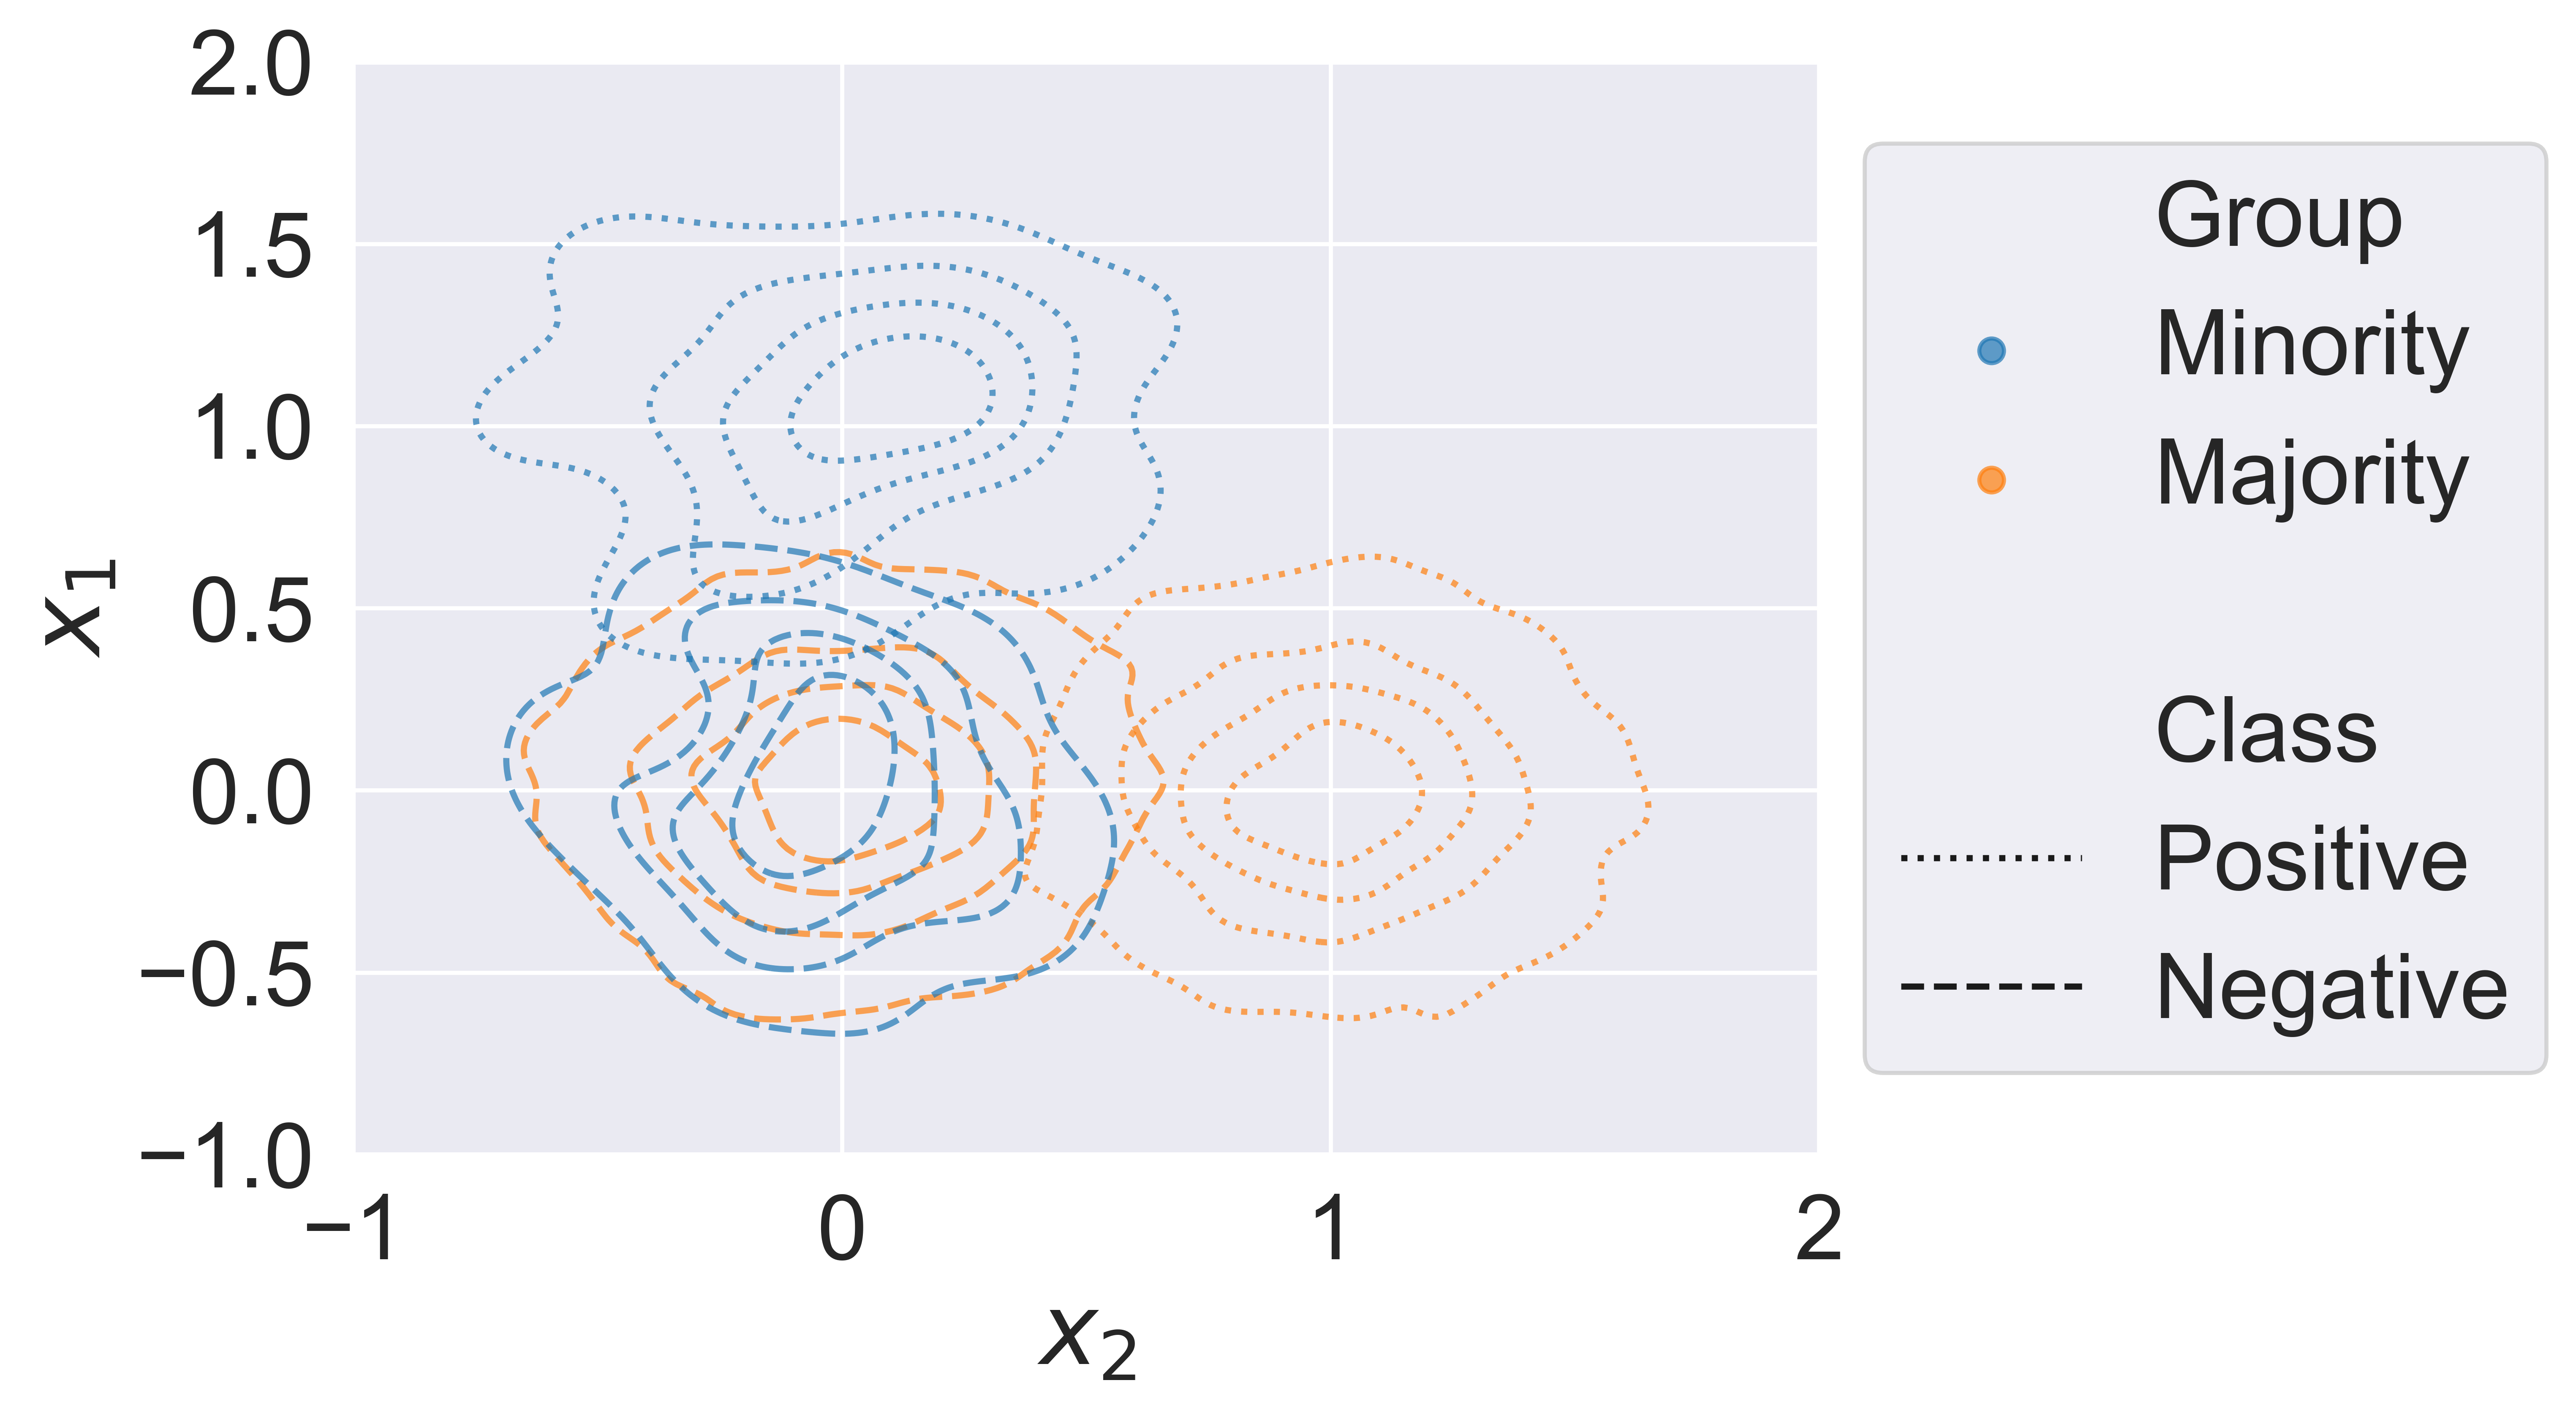

In [3]:
data, labels, protected_binarized, protected = generate_data_linear_shift(majority_size = 10000, ratio = 0.01)
display_data(data, labels, protected, distribution = True, legend = True)

In [4]:
# Imputations strategies to explore
imputations = {
                #'Complete Case': {'strategy': 'Median', 'complete_case': True},
                'Median': {'strategy': 'Median'},
                # 'Mean': {'strategy': 'Mean'},
                # 'Group Mean': {'strategy': 'Group Mean'},
                'Median Missing': {'strategy': 'Median', 'add_missing': True},
                'MICE': {'strategy': 'MICE'},
                'MICE Missing': {'strategy': 'MICE', 'add_missing': True},
                'Group MICE': {'strategy': 'Group MICE'},
                'Group MICE Missing': {'strategy': 'Group MICE', 'add_missing': True}, 
              }

### Limited access to quality care

Care is more limited in the marginalised group. Missingness is therefore concentrated in this group.

In [5]:
def limited_access(data, labels, protected, seed = 42):
    p = (protected == "Minority").astype(float) # All minority
    total = p.sum()
    selection = data.sample(int(total * 0.5), replace = False, weights = p / total, random_state = seed).index # 50 % missing
    missing = data.copy()
    missing.loc[selection, 0] = np.nan
    return missing

In [6]:
# Variable for results
performance_lim = {}

for name, args in imputations.items():
    print("Computing: ", name)
    ## Modelling
    performance_lim[name], coefs, imputed = k_experiment(majority_size = 10000, ratio = 0.01, class_balance = 0.5, 
            removal = limited_access, k = k, n_imputation = 10 if 'MICE' in name else 1, **args)

    ## Display
    # data, imputed, labels, protected_binarized, protected = imputed
    # display_data(imputed.Mean, labels, protected, distribution = True, legend = False)
    # plt.scatter([], [], alpha = 0, label = ' ')
    # plt.axline((0, coefs[0]), slope = coefs[1], c = 'black', ls = '-.', label = 'Decision boundary')
    # if name == 'Group MICE':
    #     plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    # plt.show()

Computing:  Median


100%|██████████| 100/100 [00:03<00:00, 30.25it/s]


Computing:  Median Missing


100%|██████████| 100/100 [00:03<00:00, 28.71it/s]


Computing:  MICE


100%|██████████| 100/100 [01:16<00:00,  1.31it/s]


Computing:  MICE Missing


100%|██████████| 100/100 [01:31<00:00,  1.10it/s]


Computing:  Group MICE


100%|██████████| 100/100 [01:26<00:00,  1.16it/s]


Computing:  Group MICE Missing


100%|██████████| 100/100 [01:34<00:00,  1.06it/s]


In [7]:
display_result(performance_lim, alphas = [0.35, 0.35, 1, 1])

AssertionError: Not enough transparency provided (alphas = None for non transparency)

In [8]:
display_result(performance_lim, 'Brier Score', legend = False, alphas = [0.35, 0.35, 1, 1])

AssertionError: Not enough transparency provided (alphas = None for non transparency)

### Mis-informed collection

Missingness is informed by the standard guidelines. We propose that the first dimension is observed only if the second is in a given range.

In [10]:
def misinformed(data, labels, groups, seed = 42): # Must respect this signature
    p = (data.iloc[:, 1] > 0.5).astype(float) # All above threshold
    total = p.sum()
    selection = data.sample(int(total * 0.5), replace = False, weights = p / total, random_state = seed).index
    missing = data.copy()
    missing.loc[selection, 0] = np.nan
    return missing

In [11]:
# Variable for results
performance_mis = {}

for name, args in imputations.items():
    print("Computing: ", name)
    ## Modelling
    performance_mis[name], coefs, imputed = k_experiment(majority_size = 10000, ratio = 0.01, class_balance = 0.5, 
            removal = misinformed, k = k, n_imputation = 10 if 'MICE' in name else 1, **args)

    ## Display
    # data, imputed, labels, protected_binarized, protected = imputed
    # display_data(imputed.Mean, labels, protected, distribution = True, legend = False)
    # plt.scatter([], [], alpha = 0, label = ' ')
    # plt.axline((0, coefs[0]), slope = coefs[1], c = 'black', ls = '-.', label = 'Decision boundary')
    # if name == 'Group MICE':
    #     plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    # plt.show()

Computing:  Median


100%|██████████| 100/100 [00:03<00:00, 31.92it/s]


Computing:  Median Missing


100%|██████████| 100/100 [00:03<00:00, 30.66it/s]


Computing:  MICE


100%|██████████| 100/100 [01:22<00:00,  1.21it/s]


Computing:  MICE Missing


100%|██████████| 100/100 [01:31<00:00,  1.10it/s]


Computing:  Group MICE


100%|██████████| 100/100 [01:26<00:00,  1.15it/s]


Computing:  Group MICE Missing


100%|██████████| 100/100 [01:32<00:00,  1.08it/s]


In [12]:
display_result(performance_mis, alphas = [0.35, 0.35, 1, 1])

AssertionError: Not enough transparency provided (alphas = None for non transparency)

In [13]:
display_result(performance_mis, 'Brier Score', legend = False, alphas = [0.35, 0.35, 1, 1])

AssertionError: Not enough transparency provided (alphas = None for non transparency)

### Confirmation bias

Test is performed when the outcome is expected.

In [15]:
def confirmation(data, labels, protected, seed = 42):
    p = (data.iloc[:, 0] > 0.5).astype(float) # All negatives
    total = p.sum()
    selection = data.sample(int(total * 0.5), replace = False, weights = p / total, random_state = seed).index # 50 % missing
    missing = data.copy()
    missing.loc[selection, 0] = np.nan
    return missing

In [16]:
# Variable for results
performance_conf = {}

for name, args in imputations.items():
    print("Computing: ", name)
    ## Modelling
    performance_conf[name], coefs, imputed = k_experiment(majority_size = 10000, ratio = 0.01, class_balance = 0.5, 
            removal = confirmation, k = k, n_imputation = 10 if 'MICE' in name else 1, **args)

    ## Display
    # data, imputed, labels, protected_binarized, protected = imputed
    # display_data(imputed.Mean, labels, protected, distribution = True, legend = False)
    # plt.scatter([], [], alpha = 0, label = ' ')
    # plt.axline((0, coefs[0]), slope = coefs[1], c = 'black', ls = '-.', label = 'Decision boundary')
    # if name == 'Group MICE':
    #     plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    # plt.show()

Computing:  Median


100%|██████████| 100/100 [00:02<00:00, 35.78it/s]


Computing:  Median Missing


100%|██████████| 100/100 [00:03<00:00, 26.22it/s]


Computing:  MICE


100%|██████████| 100/100 [01:17<00:00,  1.30it/s]


Computing:  MICE Missing


100%|██████████| 100/100 [01:30<00:00,  1.11it/s]


Computing:  Group MICE


100%|██████████| 100/100 [01:25<00:00,  1.17it/s]


Computing:  Group MICE Missing


100%|██████████| 100/100 [01:33<00:00,  1.07it/s]


In [17]:
display_result(performance_conf, alphas = [0.35, 0.35, 1, 1])

AssertionError: Not enough transparency provided (alphas = None for non transparency)

In [18]:
display_result(performance_conf, 'Brier Score', alphas = [0.35, 0.35, 1, 1])

AssertionError: Not enough transparency provided (alphas = None for non transparency)

----------

# Comparison minority groups

This following functions allow to reproduce the table and plots presented in the paper.

In [19]:
performances_minority = {m:
    pd.concat({
        "Confirmation bias (S3)": performance_conf[m]['Minority'],
        "(Mis)-Informed collection (S2)": performance_mis[m]['Minority'],
        "Limited access to quality care (S1)": performance_lim[m]['Minority'],
    }, axis = 1)
for m in performance_lim}

performances_majority = {m:
    pd.concat({
        "Confirmation bias (S3)": performance_conf[m]['Majority'],
        "(Mis)-Informed collection (S2)": performance_mis[m]['Majority'],
        "Limited access to quality care (S1)": performance_lim[m]['Majority'],
    }, axis = 1)
for m in performance_lim}

performances_overall = {m:
    pd.concat({
        "Confirmation bias (S3)": performance_conf[m]['Overall'],
        "(Mis)-Informed collection (S2)": performance_mis[m]['Overall'],
        "Limited access to quality care (S1)": performance_lim[m]['Overall'],
    }, axis = 1)
for m in performance_lim}

In [20]:
metric = 'AUC'

difference = {
    imput: pd.concat({'Mean': (performances_minority[imput][performances_minority[imput].index.get_level_values(1) == metric] - performances_majority[imput][performances_minority[imput].index.get_level_values(1) == metric]).mean(),
            'Std': (performances_minority[imput][performances_minority[imput].index.get_level_values(1) == metric] - performances_majority[imput][performances_minority[imput].index.get_level_values(1) == metric]).std()}, axis = 1)
    for imput in performances_overall
}

difference = pd.concat(difference, axis = 1)
difference = difference.swaplevel(0, axis = 1)
print(difference.to_latex())

\begin{tabular}{lrrrrrrrrrrrr}
\toprule
{} &      Mean &       Std &           Mean &            Std &      Mean &       Std &         Mean &          Std &       Mean &        Std &               Mean &                Std \\
{} &    Median &    Median & Median Missing & Median Missing &      MICE &      MICE & MICE Missing & MICE Missing & Group MICE & Group MICE & Group MICE Missing & Group MICE Missing \\
\midrule
Confirmation bias (S3)              & -0.319192 &  0.153110 &      -0.299545 &       0.133755 & -0.358753 &  0.150292 &    -0.292444 &     0.132122 &  -0.369553 &   0.148783 &          -0.294841 &           0.133476 \\
(Mis)-Informed collection (S2)      & -0.212380 &  0.115299 &      -0.198714 &       0.110529 & -0.202142 &  0.110702 &    -0.199633 &     0.109430 &  -0.238642 &   0.124922 &          -0.232529 &           0.121391 \\
Limited access to quality care (S1) & -0.325783 &  0.133235 &      -0.312913 &       0.132656 & -0.368019 &  0.133210 &    -0.356823 &     0.

C:\Users\steph\AppData\Local\Temp\ipykernel_19668\319893051.py:11: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(difference.to_latex())


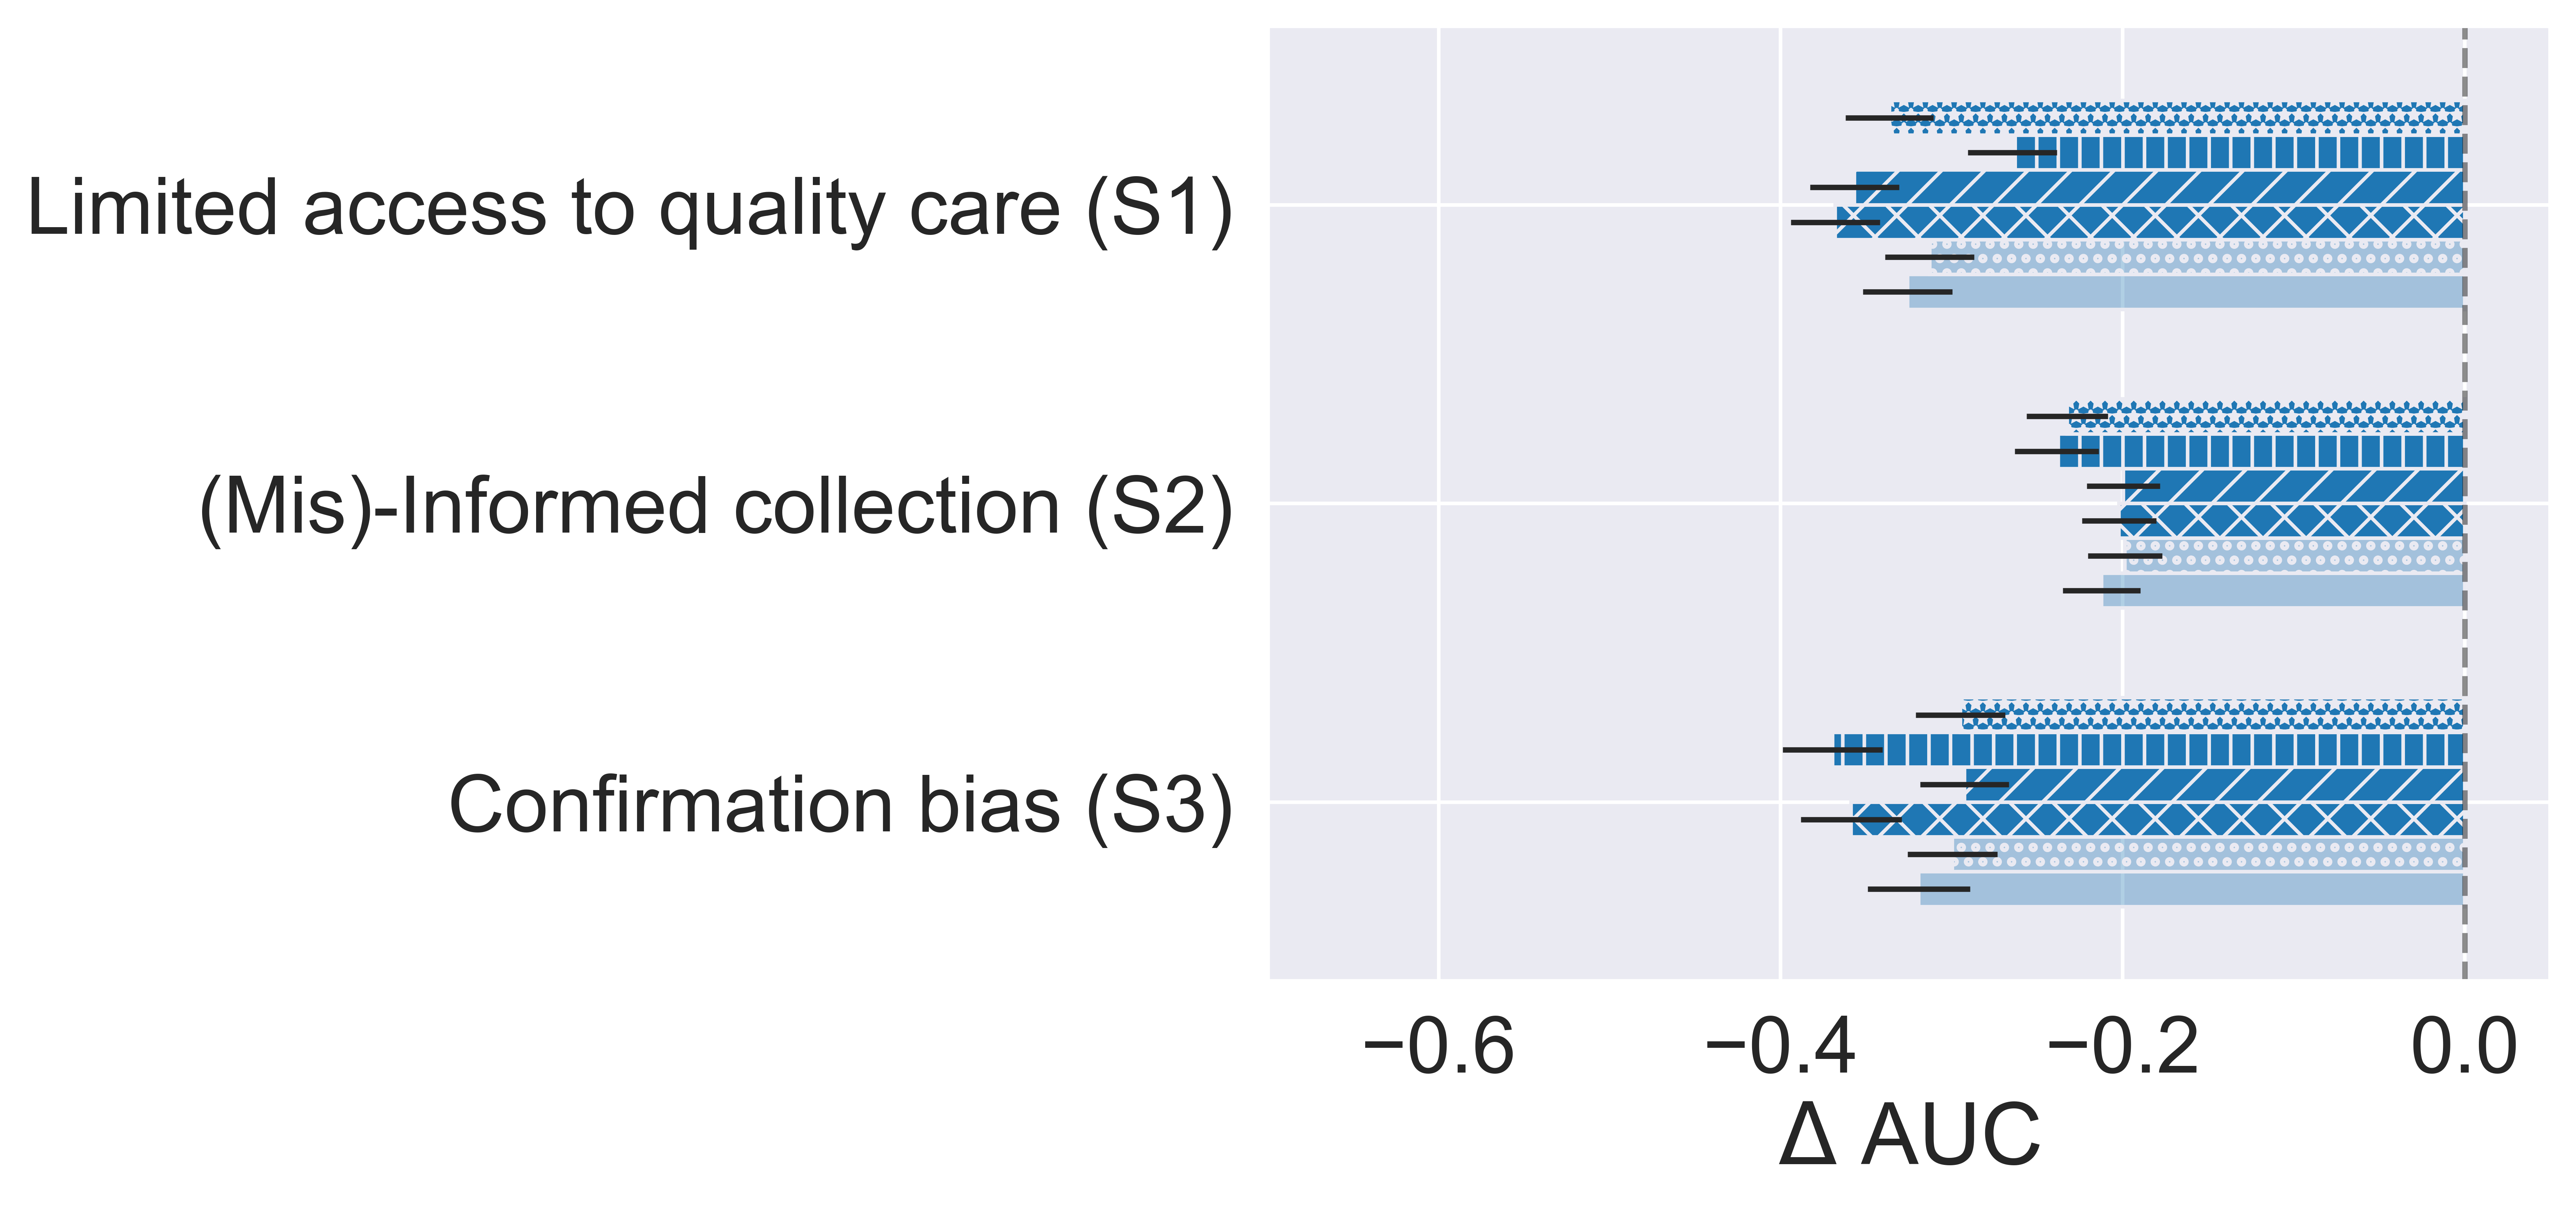

In [21]:
# Display delta performance

ax1 = difference.Mean.plot.barh(xerr = 1.96 * difference.Std / np.sqrt(100), width = 0.7, figsize = (6.4, 4.8))
hatches = ['', 'ooo', 'xx', '//', '||', '***', '++']
for i, thisbar in enumerate(ax1.patches):
    c = list(plt_colors.to_rgba('tab:blue'))
    c[3] = 0.35 if i // len(difference) < 2 else 1
    thisbar.set(edgecolor = '#eaeaf2', facecolor = c, linewidth = 1, hatch = hatches[i // len(difference)])

# Destroy legend but keep for next
patches = [ax1.patches[i * len(difference)] for i in range(len(difference.Mean.columns))][::-1]
labels = difference.Mean.columns.tolist()[::-1]
ax1.legend([], [], framealpha = 0)

plt.xlim(-0.70, 0.05)
plt.axvline(0, ls = '--', alpha = 0.5, c = 'k')
plt.xlabel('$\Delta$ AUC')
plt.show()

Text(0.5, 0, 'Group-specific AUC')

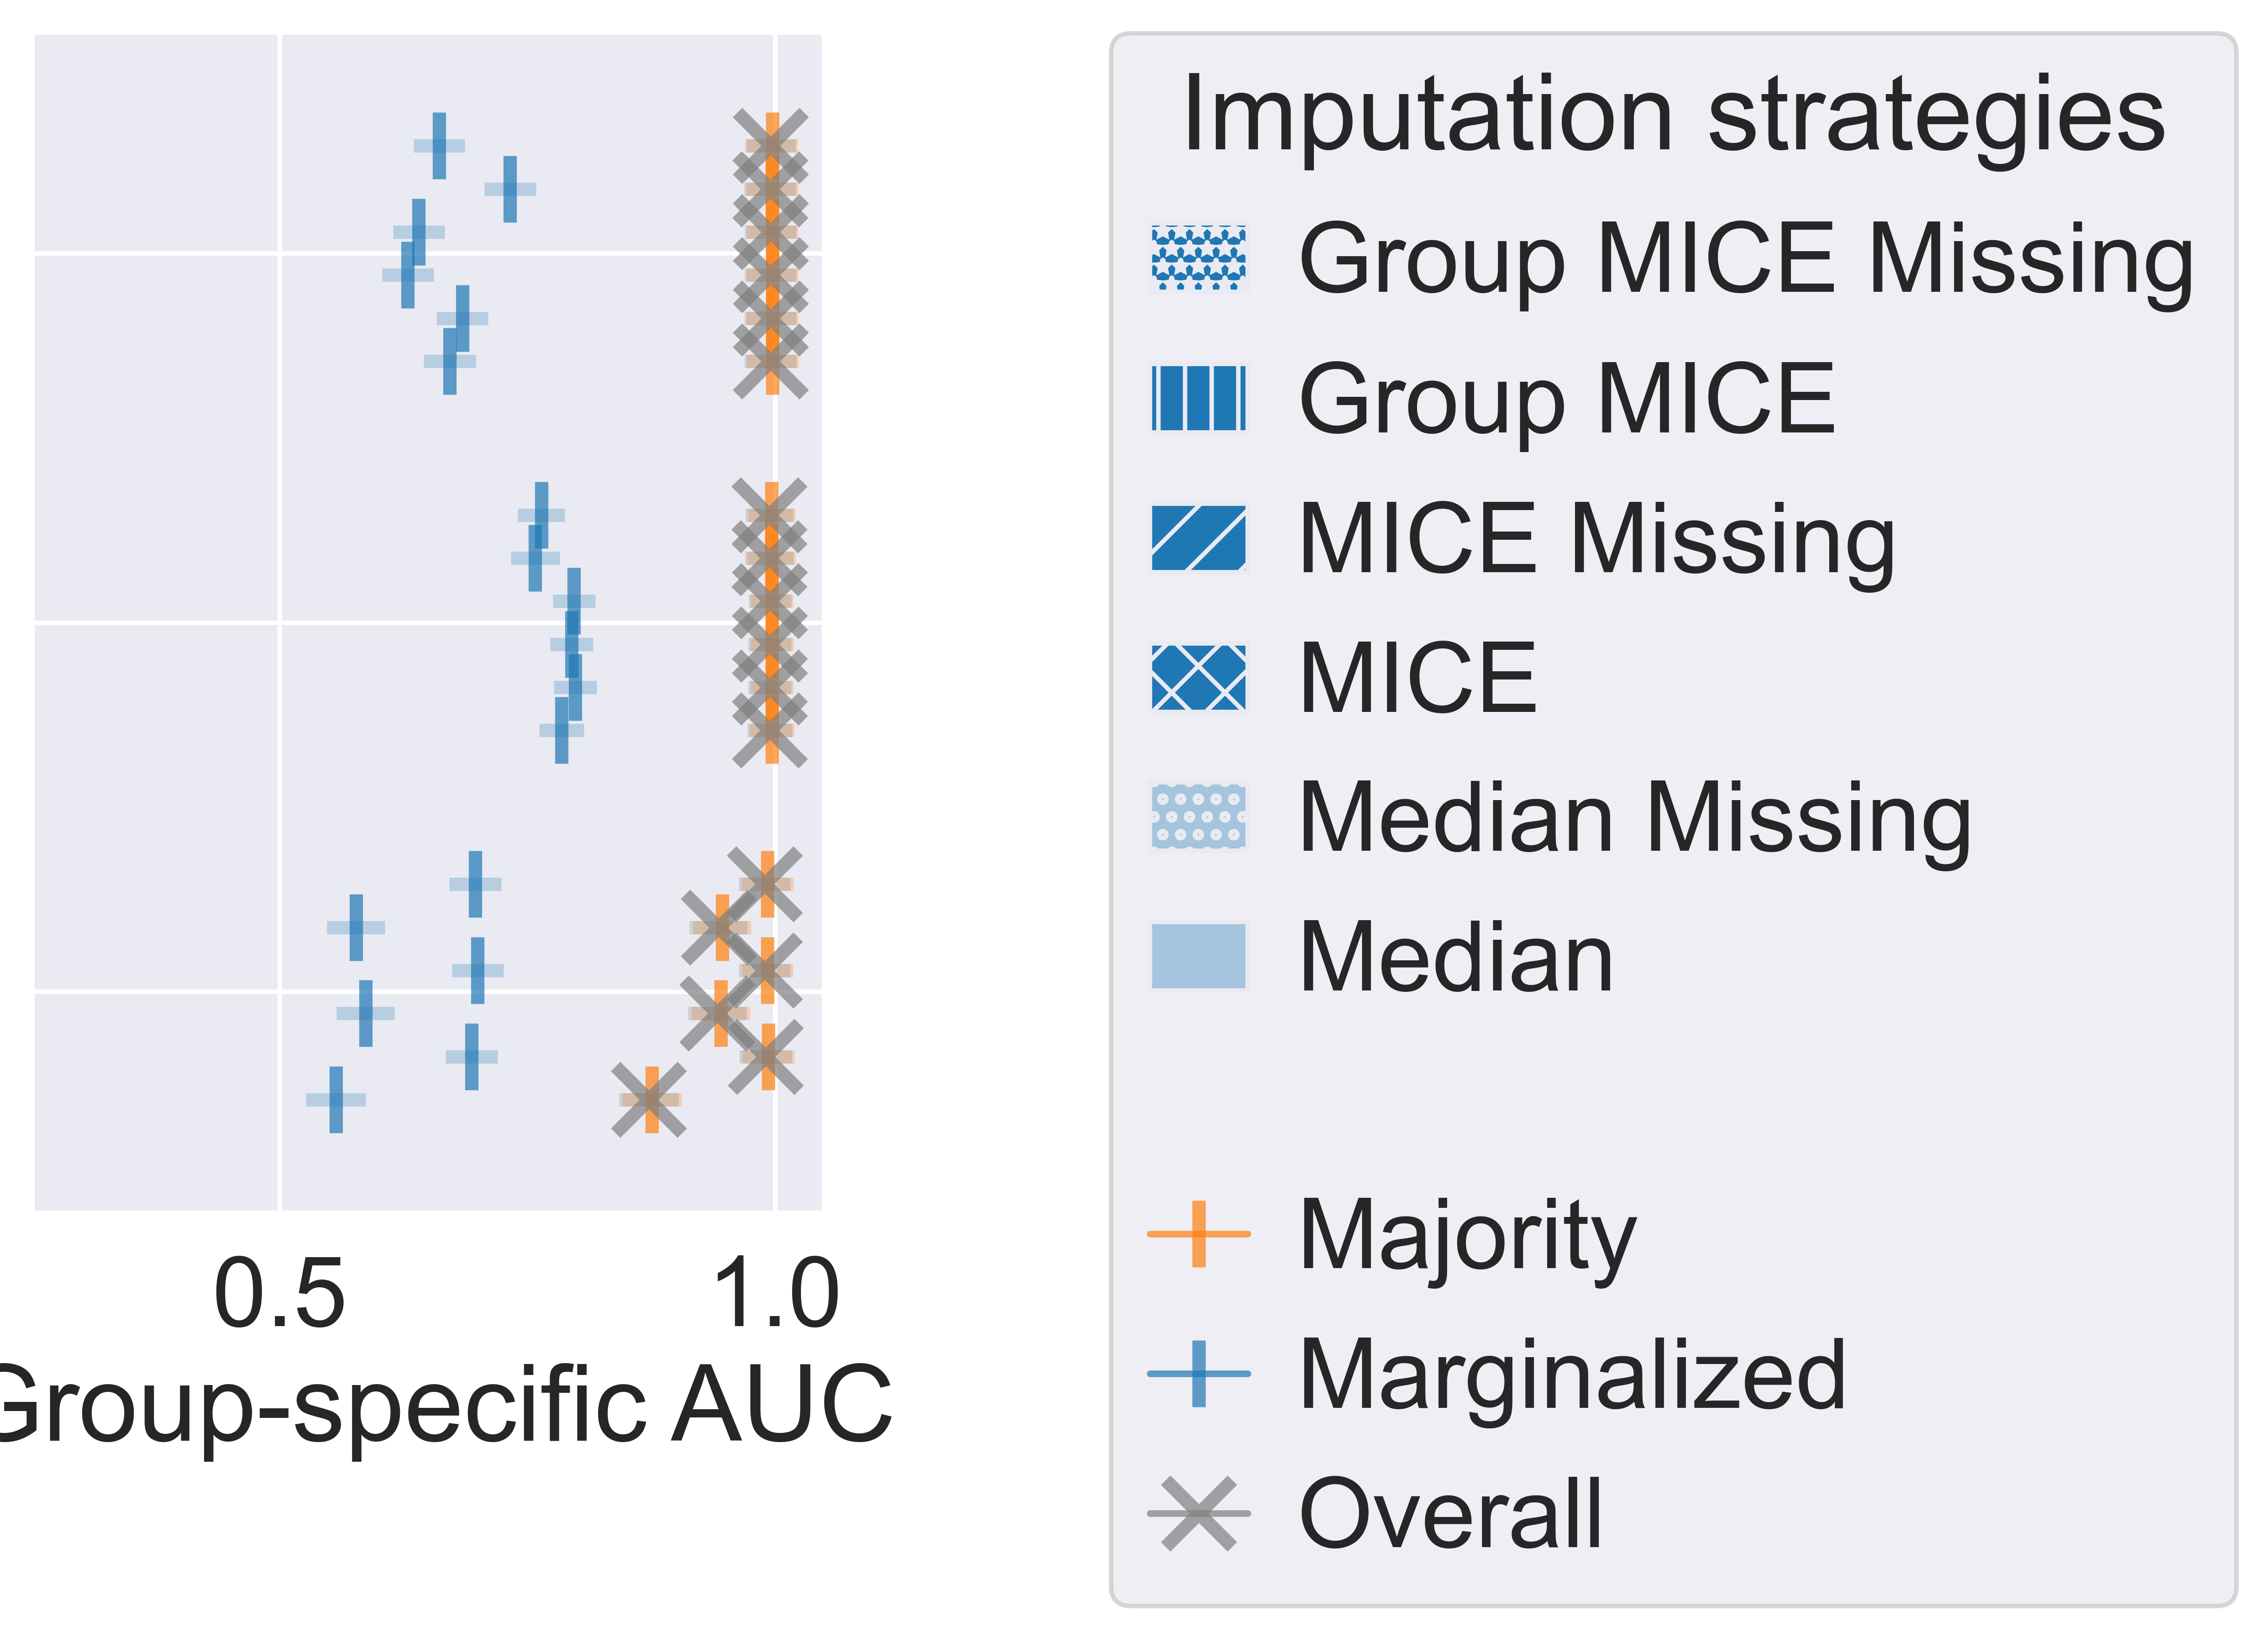

In [22]:
ax, last = None, 0
patches += ax1.plot(np.NaN, np.NaN, '-', color='none')
labels += [' ']
for (group, color, name) in [(performances_majority, 'tab:orange', 'Majority'), (performances_minority, 'tab:blue', 'Marginalized'), (performances_overall, 'tab:gray', 'Overall')]:
    mean = {
        imput: pd.concat({'Mean': group[imput][group[imput].index.get_level_values(1) == metric].mean(),
            'Std': group[imput][group[imput].index.get_level_values(1) == metric].std()}, axis = 1)
        for imput in performances_overall
    }
    mean = pd.concat(mean, axis = 1).swaplevel(0, axis = 1)
    ax = mean.Mean.plot.barh(ax = ax, legend = False, xerr = 1.96 * difference.Std / np.sqrt(100), width = 0.7, ecolor = color, error_kw = {"alpha": 0.25, 'elinewidth': 3}, figsize = (3.2, 4.8))

    # Remove bar and replace with dot
    for i, thisbar in enumerate(ax.patches):
        if i >= last:
            thisbar.set(alpha = 0)
            dot = ax.plot(thisbar.get_width(), thisbar.get_y() + thisbar.get_height() / 2, color = color, alpha = 0.7, marker = ('|' if name != 'Overall' else 'x'), markersize = 15, markeredgewidth=3)
            last += 1

    patches += dot
    labels += [name]

ax.set_yticklabels([])
ax.set_xlim(0.25, 1.05)
ax.legend(patches, labels, loc='upper left', bbox_to_anchor=(1.3, 1.04),
        title = 'Imputation strategies', handletextpad = 0.5, handlelength = 1.0, columnspacing = -0.5,)
ax.set_xlabel('Group-specific AUC')


C:\Users\steph\AppData\Local\Temp\ipykernel_19668\3063003953.py:19: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(pd.DataFrame.from_dict({m: ["{:.3f} ({:.3f})".format(mean.loc[m].loc[i], ci.loc[m].loc[i]) for i in mean.columns] for m in mean.index}, columns = mean.columns, orient = 'index').to_latex())


\begin{tabular}{lllllll}
\toprule
{} &         Median & Median Missing &           MICE &   MICE Missing &     Group MICE & Group MICE Missing \\
\midrule
Confirmation bias (S3)              &  0.557 (0.030) &  0.694 (0.026) &  0.587 (0.029) &  0.700 (0.026) &  0.577 (0.029) &      0.698 (0.026) \\
(Mis)-Informed collection (S2)      &  0.785 (0.023) &  0.798 (0.022) &  0.795 (0.022) &  0.797 (0.021) &  0.758 (0.024) &      0.764 (0.024) \\
Limited access to quality care (S1) &  0.672 (0.026) &  0.684 (0.026) &  0.629 (0.026) &  0.641 (0.026) &  0.733 (0.026) &      0.661 (0.026) \\
\bottomrule
\end{tabular}



IndexError: list index out of range

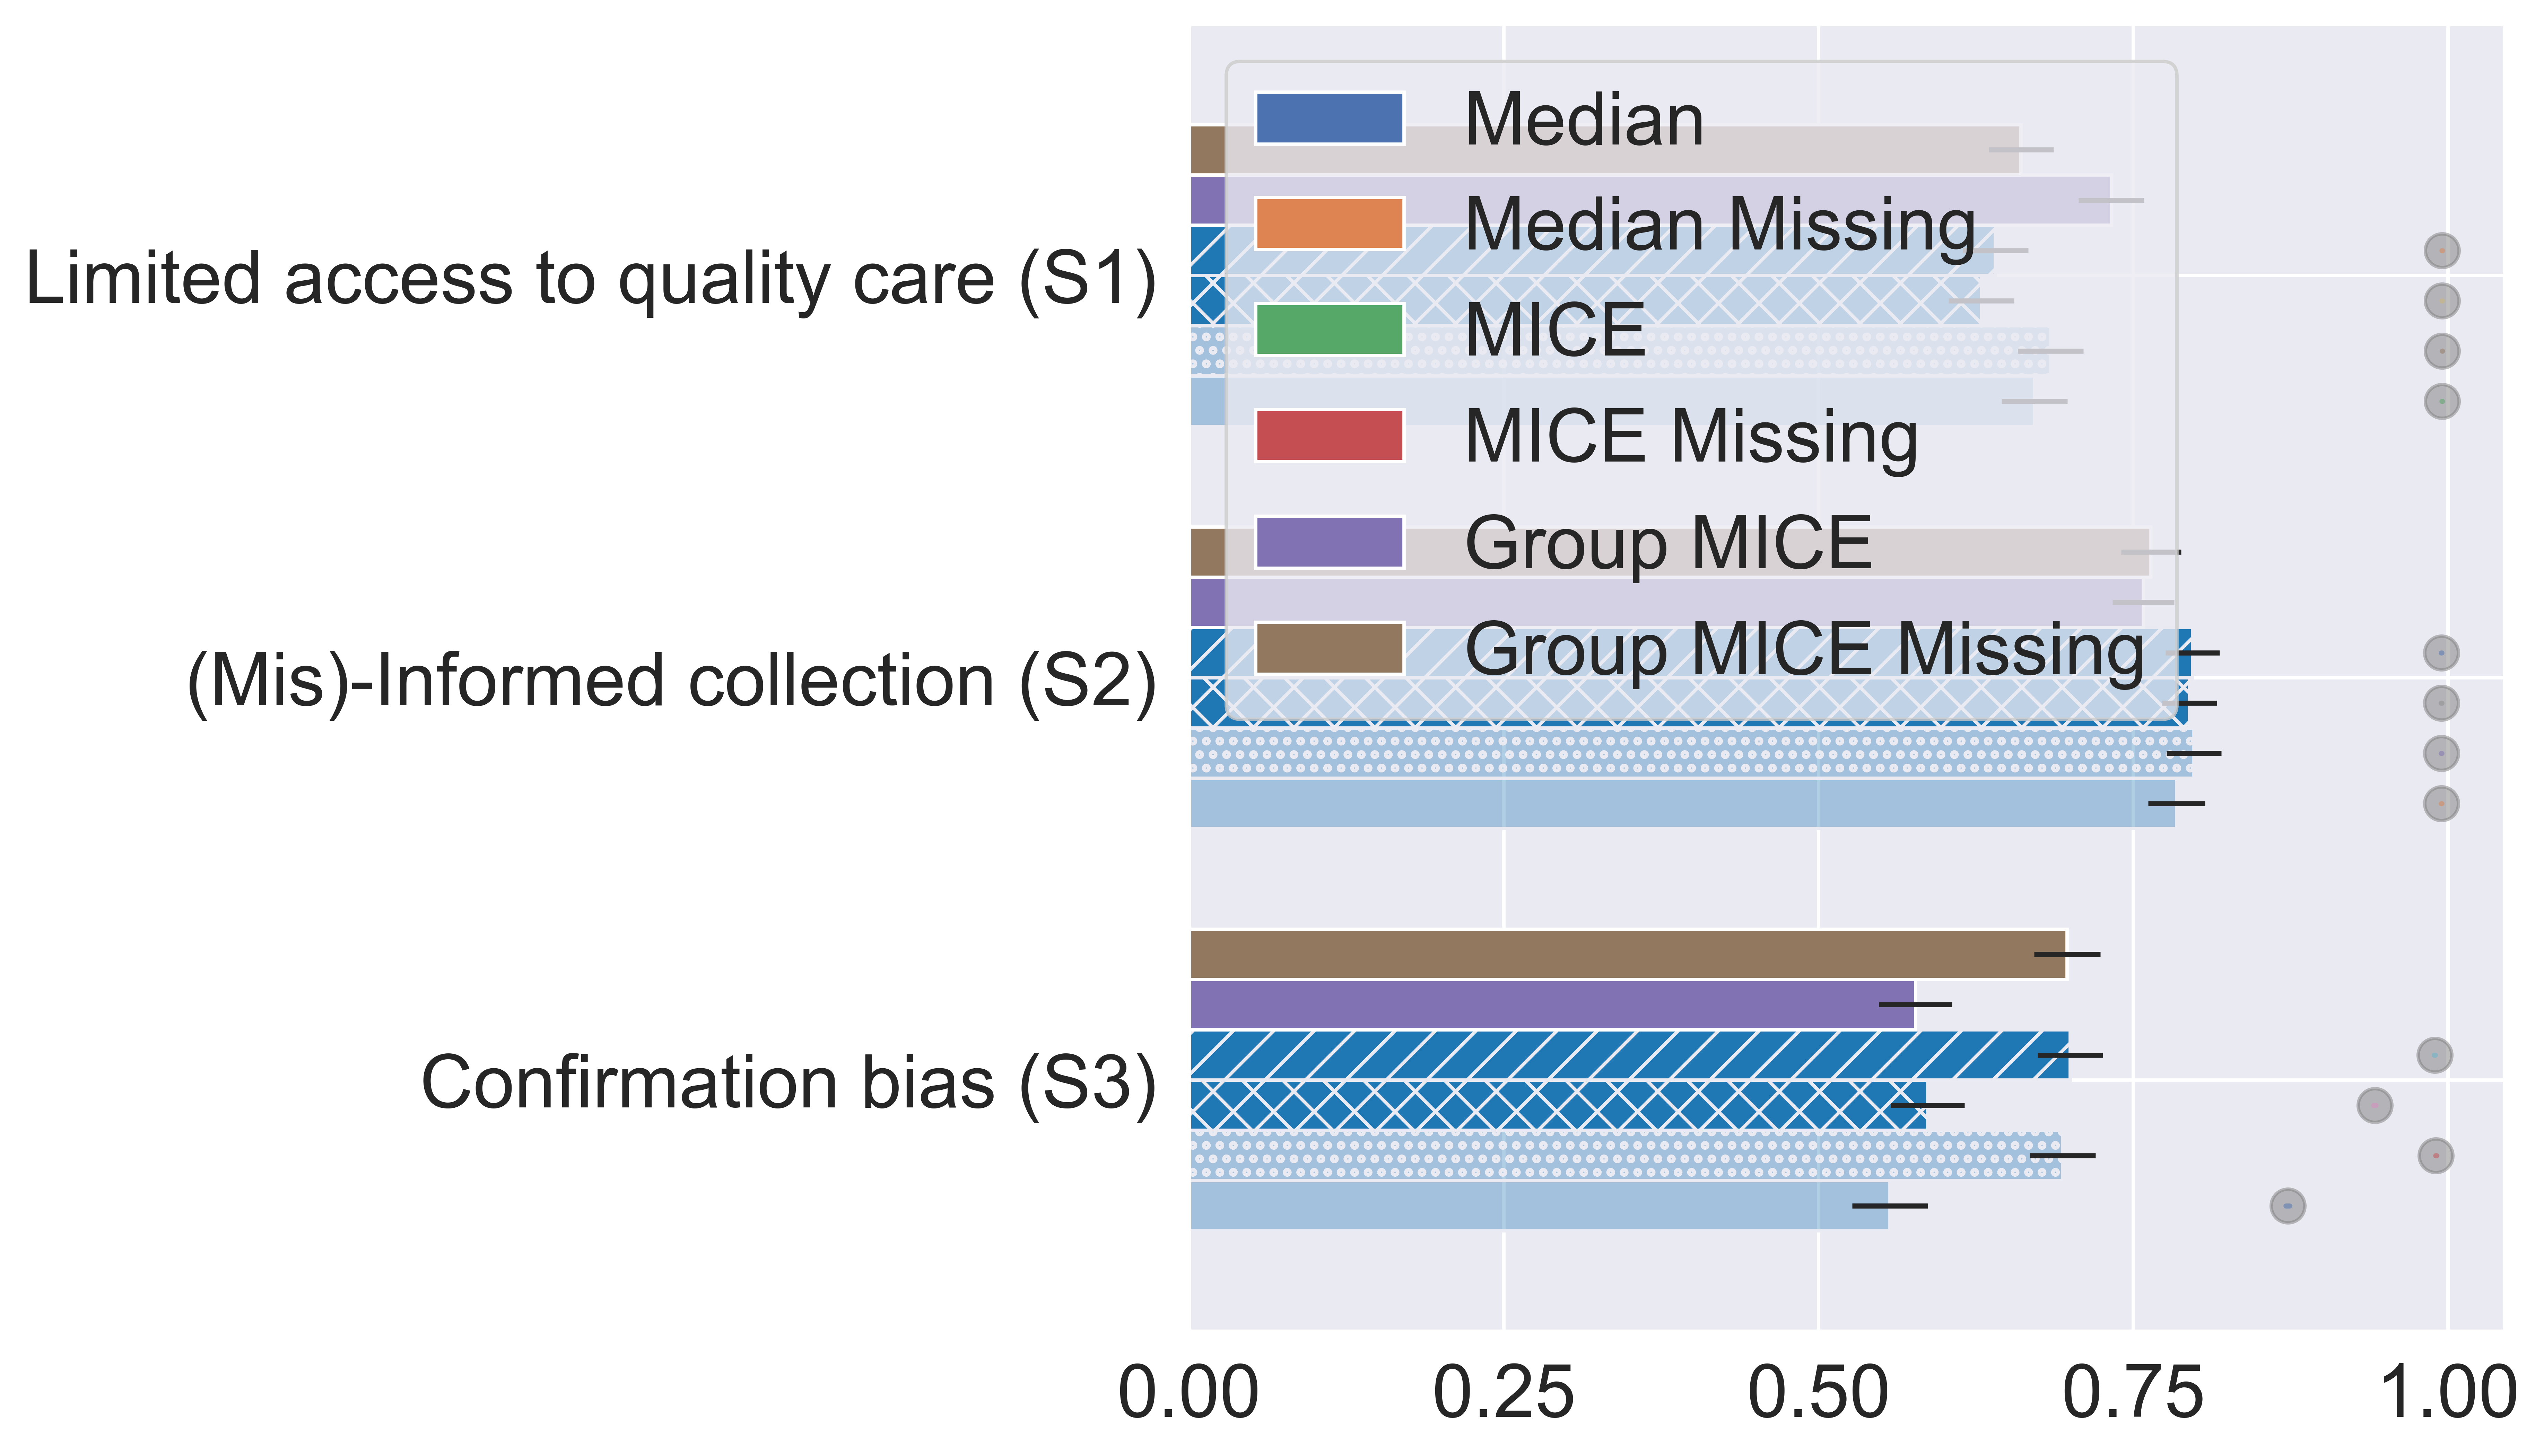

In [23]:
def display_result(performance, type = 'AUC', legend = True, colors = ['tab:orange', 'tab:blue', 'tab:gray'], alphas = None, overall_perf = None):
    mean, ci, dots, dots_ci = {}, {}, {}, {}
    for method in performance:
        mean[method], ci[method], dots[method], dots_ci[method] = {}, {}, {}, {}
        for group in performance[method].columns:
            meth_group = performance[method][group]
            meth_group = meth_group[meth_group.index.get_level_values('Metric') == type]

            if overall_perf is not None:
                meth_all = overall_perf[method][group]
                meth_all = meth_all[meth_all.index.get_level_values('Metric') == type]
                dots[method][group] = meth_all.mean()
                dots_ci[method][group] = 1.96 * meth_all.std() / np.sqrt(len(meth_all))

            mean[method][group] = meth_group.mean()
            ci[method][group] = 1.96 * meth_group.std() / np.sqrt(len(meth_group))

    mean, ci, dots, dots_ci = pd.DataFrame.from_dict(mean), pd.DataFrame.from_dict(ci), pd.DataFrame.from_dict(dots), pd.DataFrame.from_dict(dots_ci)
    print(pd.DataFrame.from_dict({m: ["{:.3f} ({:.3f})".format(mean.loc[m].loc[i], ci.loc[m].loc[i]) for i in mean.columns] for m in mean.index}, columns = mean.columns, orient = 'index').to_latex())
    ax = mean.plot.barh(xerr = ci, legend = legend, figsize = (7, 7), width = 0.75)
    # Change colors
    hatches = ['', 'ooo', 'xx', '//', '||', '***', '++']
    for i, thisbar in enumerate(ax.patches):
        c = list(plt_colors.to_rgba(colors[i % len(mean)]))
        c[3] = 1 if alphas is None else alphas[i // len(mean)]
        thisbar.set(edgecolor = '#eaeaf2', facecolor = c, linewidth = 1, hatch = hatches[i // len(mean)])

        if overall_perf is not None:
            y = thisbar.get_y() + thisbar.get_height() / 2
            plt.plot([dots.values[i % len(mean)][i // len(mean)] - dots_ci.values[i % len(mean)][i // len(mean)], dots.values[i % len(mean)][i // len(mean)] + dots_ci.values[i % len(mean)][i // len(mean)]], [y, y], alpha = 0.5)
            scatter = plt.scatter(dots.values[i % len(mean)][i // len(mean)], y, c = 'tab:gray', label = 'Population ' + type, alpha = 0.5, s = 100)
        
    plt.grid(alpha = 0.3)
    
    if type == 'AUC':
        plt.xlim(0.2, 1.0)
        plt.axvline(0.5, ls = ':', c = 'k', alpha = 0.5)
    else:
        plt.xlim(0., 0.8)
    plt.xlabel(type)

    if legend:
        ncol = len(np.unique(colors))
        patches = [ax.patches[i * len(mean) + j] for j in range(ncol) for i in range(len(mean.columns))][::-1]
        labels = [''] * (len(patches) - len(mean.columns)) + mean.columns.tolist()[::-1] 
        
        if dots is not None:
            patches += [plt.scatter([], [], label = ' ', alpha = 0), scatter]
            labels  += ['', 'Population ' + type]

        ax.legend(patches, labels, loc='center left', bbox_to_anchor=(1, 0.5),
            title = 'Imputation strategies', ncol = ncol, handletextpad = 0.5, handlelength = 1.0, columnspacing = -0.5,)

display_result(performances_minority, colors = ['tab:blue', 'tab:blue', 'tab:blue'], alphas = [0.35, 0.35, 1, 1], overall_perf = performances_overall)